#                                Analysis of Accidents in USA

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the csv file in Data Frame

df = pd.read_csv(r"C:\Users\ruchi\Downloads\archive (4)\US_Accidents_Dec21_updated.csv")

In [3]:
df.head(2)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night


In [5]:
df.shape

(2845342, 47)

<AxesSubplot:>

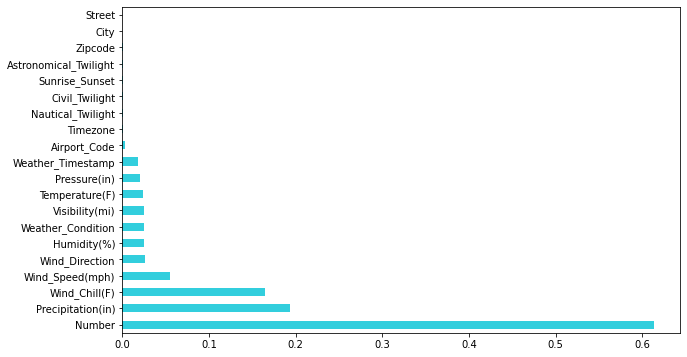

In [78]:
# Find the number of Missing values
plt.figure(figsize=(10,6))
df.isna().sum().sort_values(ascending=False)
missing_percentage = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentage[missing_percentage !=0].plot(kind= 'barh'  , color='#32cedd')

# Top 10 Cities in US with most number of Accidents (2016-2021)

In [7]:
# create a data frame with top 10 cities

Top_10_cities=df['City'].value_counts().sort_values(ascending=False)[:10]

In [8]:
new_df =Top_10_cities.rename_axis('City').reset_index(name='Count of Accidents')

In [9]:
new_df.head

<bound method NDFrame.head of           City  Count of Accidents
0        Miami              106966
1  Los Angeles               68956
2      Orlando               54691
3       Dallas               41979
4      Houston               39448
5    Charlotte               33152
6   Sacramento               32559
7    San Diego               26627
8      Raleigh               22840
9  Minneapolis               22768>

In [10]:
# Get Total number of accidents which is required for percentage

Total_count = df.shape[0]


In [11]:
# Add new column 'Percentage' in the new Dataframe

percentage=[]
for i in range(10):
    pct= (new_df['Count of Accidents'][i] / Total_count) * 100
    percentage.append(round(pct,2))

In [12]:
 new_df['Percentage']=percentage

In [13]:
new_df

,City,Count of Accidents,Percentage
0,Miami,106966,3.76
1,Los Angeles,68956,2.42
2,Orlando,54691,1.92
3,Dallas,41979,1.48
4,Houston,39448,1.39
5,Charlotte,33152,1.17
6,Sacramento,32559,1.14
7,San Diego,26627,0.94
8,Raleigh,22840,0.80
9,Minneapolis,22768,0.80


Text(0.5, 1.0, 'Top 10 cities with maximum number of Accidents')

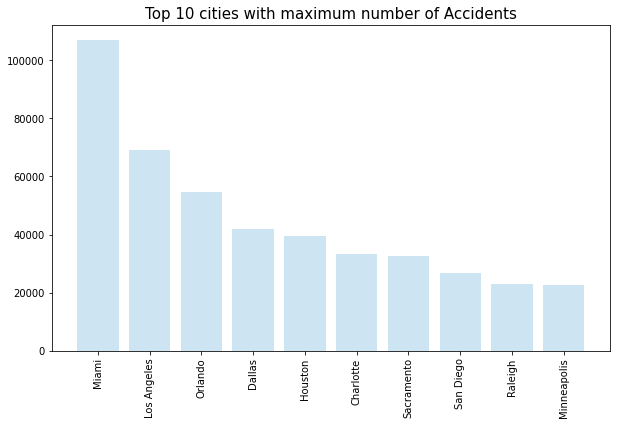

In [25]:
# Plot Bar chart
plt.figure(figsize=(10,6))
graph= plt.bar(new_df.City , new_df['Count of Accidents'],color='#cde5f3')
plt.xticks(rotation =90)
plt.title("Top 10 cities with maximum number of Accidents" , fontsize=15  )


Insights:

1. Miami is the city with highest (3.76%) no. of road accidents in US (2016-2021).

2. Los Angeles is the city with 2nd highest (2.42%) no. of road accidents in US (2016-2021).

3. Around 15.82% accident records of past 6 years are only from these 10 cities out of 19,500 cities in US (as per the dataset).

In [ ]:
# show percentage label on the bar graph(Working on this)


# i=0
# for p in graph:
#     width = p.get_width()
#     height=p.get_height()
#     x,y = p.get_xy()
#     plt.text( x+width/2 , y+height/2, str(new_df.Percentage[i]))
#     i+=1
# plt.show()

# Peak time of the accidents during each day

Text(0, 0.5, 'No. of Accidents')

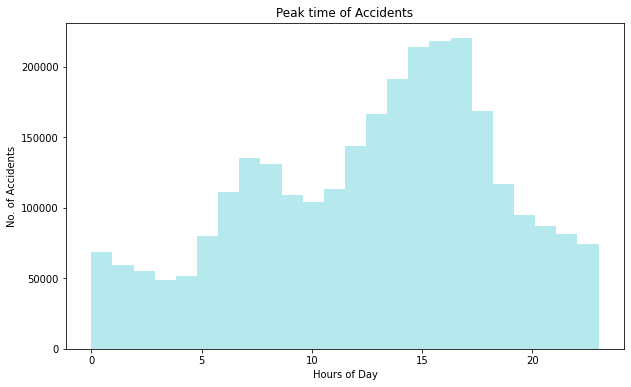

In [31]:
plt.figure(figsize=(10,6))
df.Start_Time = pd.to_datetime(df.Start_Time)
plt.hist(df.Start_Time.dt.hour,bins=24,color='#b5e9ee' )

plt.title("Peak time of Accidents")
plt.xlabel('Hours of Day')
plt.ylabel("No. of Accidents")


Insights:
Most of accidents occured between 3PM and 5PM.
And between 7AM and 9AM.
More number of cars are on the road because people commute to work.

(array([419821., 443968., 455037., 463477., 492074., 311691., 259274.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

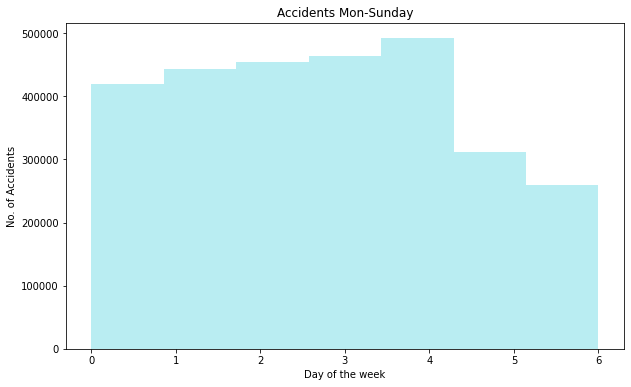

In [35]:

df.Start_Time.dt.dayofweek
plt.figure(figsize=(10,6))
plt.title("Accidents Mon-Sunday")
plt.xlabel('Day of the week')
plt.ylabel("No. of Accidents")
plt.hist(df.Start_Time.dt.dayofweek,bins=7,color='#b9edf2')
#The day of the week with Monday=0, Sunday=6.

Insight:
Number of accidents are less on weekends.

# Accidents over the Years

In [63]:
df_year=df.Start_Time.dt.year.value_counts()
df_year =df_year.rename_axis('Year').reset_index(name='Count')

In [66]:
per_year=[]
for i in range(df_year.shape[0]):
    pct= (df_year['Count'][i] / Total_count) * 100
    per_year.append(round(pct,2))

In [68]:
df_year['per_year'] =per_year

In [69]:
df_year

,Year,Count,per_year
0,2021,1511745,53.13
1,2020,625864,22.00
2,2019,258615,9.09
3,2017,163918,5.76
4,2018,163176,5.73
5,2016,122024,4.29


Text(0, 0.5, '% Rise in accident')

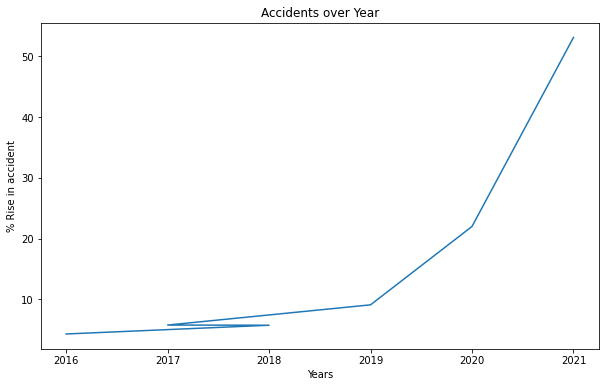

In [75]:

plt.figure(figsize=(10,6))
plt.plot(df_year.Year,df_year.per_year)
plt.title("Accidents over Year")
plt.xlabel('Years')
plt.ylabel("% Rise in accident")

Insights:

1.From the above figure, it is clear that in last 6 years (2016-2021) in US accidents percentage has increased significantly.

2.53% of the total road accident of last 6 years happened in 2021.

# Severity of Accidents 


Text(0.5, 1.0, 'Impact on the Traffic due to Accident')

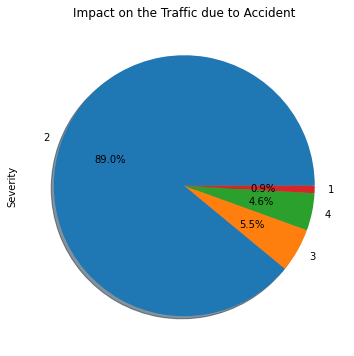

In [77]:

fig = plt.figure(figsize=(6,6))
df.Severity.value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.title("Impact on the Traffic due to Accident")

Insight:
1 In 89%  Cases of road accidents, the impact on the traffic was Moderate (Severity-2).
2 In 4.6% Cases of road accidents, the impact on the traffic was highly Severe (Severity-4).